In [1]:
from imdb import IMDb
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
imdb = IMDb()

In [3]:
series = imdb.search_movie("That '70s Show")
id = series[0].movieID
id

'0165598'

In [4]:
show = imdb.get_movie(id)
imdb.update(show, "episodes")

In [5]:
#show["episodes"][1][1].getID()

In [6]:
ratings = []
for x in range(1,9):
    season_ratings = []
    for y in range(1,28):
        #print(x, y)
        try:
            id = show["episodes"][x][y].getID()
            episode = imdb.get_movie(id)
            season_ratings.append(episode["rating"])
        except:
            break
    ratings.append(season_ratings)
            
ratings

[[8.1,
  8.1,
  7.8,
  7.7,
  7.7,
  8.2,
  8.0,
  7.9,
  7.8,
  7.6,
  8.2,
  8.0,
  7.8,
  7.8,
  7.9,
  7.8,
  8.2,
  8.0,
  7.9,
  8.4,
  8.3,
  7.4,
  8.1,
  8.2,
  8.1],
 [8.5,
  7.8,
  7.6,
  7.6,
  8.2,
  7.9,
  7.8,
  8.1,
  7.7,
  7.7,
  7.7,
  7.6,
  7.8,
  7.8,
  7.9,
  7.9,
  7.9,
  7.9,
  8.2,
  7.8,
  7.6,
  7.4,
  7.6,
  7.8,
  8.2,
  8.0],
 [8.3,
  8.2,
  7.6,
  8.0,
  7.7,
  8.5,
  7.4,
  8.0,
  7.7,
  7.8,
  7.7,
  7.7,
  8.7,
  7.6,
  7.7,
  7.8,
  8.1,
  7.8,
  7.5,
  7.5,
  7.6,
  7.7,
  8.3,
  7.4,
  7.8],
 [8.0,
  7.6,
  7.6,
  7.7,
  7.7,
  7.6,
  7.4,
  7.4,
  7.7,
  7.8,
  7.4,
  7.5,
  7.6,
  8.2,
  7.8,
  7.4,
  7.6,
  7.3,
  7.7,
  8.3,
  8.1,
  7.8,
  8.1,
  7.3,
  7.5,
  7.6,
  8.1],
 [7.8,
  7.6,
  7.7,
  7.7,
  7.5,
  7.6,
  7.6,
  7.8,
  7.7,
  7.6,
  7.4,
  8.0,
  7.6,
  7.6,
  7.6,
  7.6,
  7.5,
  7.7,
  7.5,
  7.4,
  7.3,
  8.1,
  7.6,
  7.9,
  8.2],
 [7.6,
  7.5,
  7.7,
  7.6,
  7.4,
  7.6,
  7.6,
  7.4,
  7.7,
  7.6,
  7.4,
  7.4,
  7.4,
  7.6,
 

In [15]:
len(ratings)

8

In [101]:
ratings_frame = pd.DataFrame(ratings)
ratings_frame.to_csv("ratings.csv", index = False)

NameError: name 'ratings' is not defined

In [99]:
read_frame = pd.read_csv("ratings.csv")
read_frame

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,8.1,8.1,7.8,7.7,7.7,8.2,8.0,7.9,7.8,7.6,...,8.0,7.9,8.4,8.3,7.4,8.1,8.2,8.1,NaN,NaN
1,8.5,7.8,7.6,7.6,8.2,7.9,7.8,8.1,7.7,7.7,...,7.9,8.2,7.8,7.6,7.4,7.6,7.8,8.2,8.0,NaN
2,8.3,8.2,7.6,8.0,7.7,8.5,7.4,8.0,7.7,7.8,...,7.8,7.5,7.5,7.6,7.7,8.3,7.4,7.8,NaN,NaN
3,8.0,7.6,7.6,7.7,7.7,7.6,7.4,7.4,7.7,7.8,...,7.3,7.7,8.3,8.1,7.8,8.1,7.3,7.5,7.6,8.1
4,7.8,7.6,7.7,7.7,7.5,7.6,7.6,7.8,7.7,7.6,...,7.7,7.5,7.4,7.3,8.1,7.6,7.9,8.2,NaN,NaN
5,7.6,7.5,7.7,7.6,7.4,7.6,7.6,7.4,7.7,7.6,...,7.4,7.2,7.7,7.3,8.0,7.4,7.4,7.6,NaN,NaN
6,7.4,7.4,7.3,7.3,7.1,7.2,7.4,7.3,7.3,7.5,...,7.1,7.2,7.3,7.3,7.2,7.2,7.6,8.1,NaN,NaN
7,7.2,6.7,6.4,7.0,7.0,6.6,6.8,6.6,6.4,6.3,...,6.6,6.5,6.5,7.4,8.9,NaN,NaN,NaN,NaN,NaN


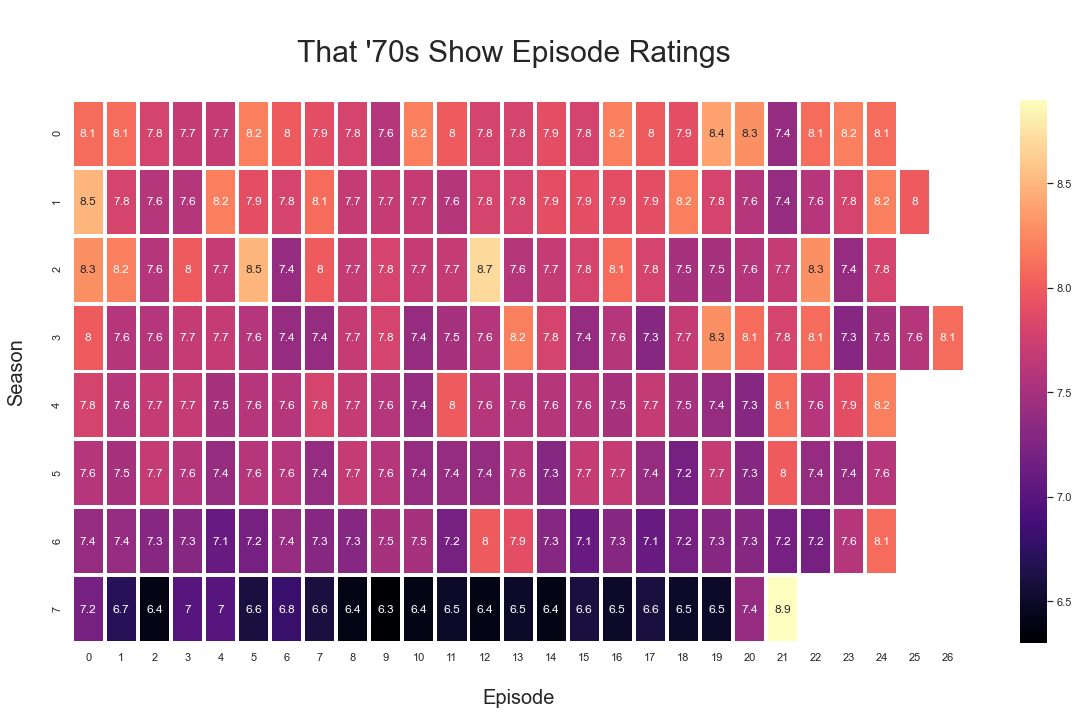

In [102]:
dims = (20,10)
fig, ax = plt.subplots(figsize = dims)
ax.set_title("\nThat '70s Show Episode Ratings \n", size = 30)
sns.heatmap(ax = ax, data = read_frame, annot=True, linewidths = 3, cmap = "magma")
ax.set_xlabel("\nEpisode", size = 20)
ax.set_ylabel("Season\n", size = 20)
fig.savefig( "heatmap.png")

In [61]:
season_means = np.array(ratings_frame.mean(axis = 1)).reshape(-1,1)
season_means

array([[7.96      ],
       [7.84615385],
       [7.848     ],
       [7.7       ],
       [7.664     ],
       [7.532     ],
       [7.384     ],
       [6.73636364]])

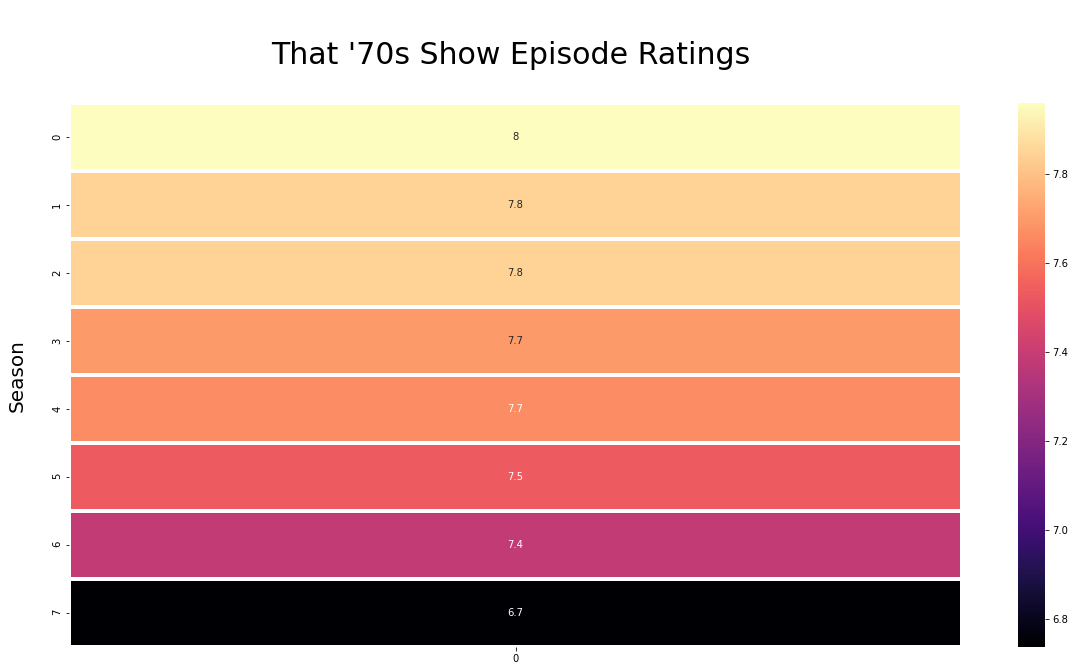

In [68]:
dims = (20,10)
fig, ax = plt.subplots(figsize = dims)
ax.set_title("\nThat '70s Show Episode Ratings \n", size = 30)
sns.heatmap(ax = ax, data = season_means, annot=True, linewidths = 3, cmap = "magma")
ax.set_ylabel("Season\n", size = 20)
fig.savefig("season gradient.png")

In [63]:
sns.heatmap(ax = ax, data = ratings_frame, annot=True, linewidths = 3, cmap = "magma")


<AxesSubplot:title={'center':"\nThat '70s Show Episode Ratings \n"}>

In [10]:
ratings_frame

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,8.1,8.1,7.8,7.7,7.7,8.2,8.0,7.9,7.8,7.6,...,8.0,7.9,8.4,8.3,7.4,8.1,8.2,8.1,NaN,NaN
1,8.5,7.8,7.6,7.6,8.2,7.9,7.8,8.1,7.7,7.7,...,7.9,8.2,7.8,7.6,7.4,7.6,7.8,8.2,8.0,NaN
2,8.3,8.2,7.6,8.0,7.7,8.5,7.4,8.0,7.7,7.8,...,7.8,7.5,7.5,7.6,7.7,8.3,7.4,7.8,NaN,NaN
3,8.0,7.6,7.6,7.7,7.7,7.6,7.4,7.4,7.7,7.8,...,7.3,7.7,8.3,8.1,7.8,8.1,7.3,7.5,7.6,8.1
4,7.8,7.6,7.7,7.7,7.5,7.6,7.6,7.8,7.7,7.6,...,7.7,7.5,7.4,7.3,8.1,7.6,7.9,8.2,NaN,NaN
5,7.6,7.5,7.7,7.6,7.4,7.6,7.6,7.4,7.7,7.6,...,7.4,7.2,7.7,7.3,8.0,7.4,7.4,7.6,NaN,NaN
6,7.4,7.4,7.3,7.3,7.1,7.2,7.4,7.3,7.3,7.5,...,7.1,7.2,7.3,7.3,7.2,7.2,7.6,8.1,NaN,NaN
7,7.2,6.7,6.4,7.0,7.0,6.6,6.8,6.6,6.4,6.3,...,6.6,6.5,6.5,7.4,8.9,NaN,NaN,NaN,NaN,NaN


In [5]:
# This cell iterates through every episode object,
# extracts the writers, then saves the writers
# into a list
# it DOES NOT convert the writers from IMDB objects into
# simple strings, nor does it remove spaces

writers = []

# there are 8 seasons, IMDBPy returns them starting at 1, not 0
for x in range(1,9):
    
    # temp array for seasons
    season_writers = []
    
    # max amount of episodes per season is 28,
    # we will handle exiting with a try/catch
    for y in range(1,28):
        
        try:
            # get the individual episode and dispaly
            id = show["episodes"][x][y].getID()
            episode = imdb.get_movie(id)
            #print(episode["kind"], " ", x, ":", y)
            
            # temp array for all writers in an episode
            episode_writers = []
            
            # iterate through all writers and add to array
            for writer in episode["writers"]:
                #print(y , ": ", writer)
                episode_writers.append(writer)
            #print()
                
            # add to array temp season array
            season_writers.append(episode_writers)
            
        except:
            #print("exception")
            break
    
    # add season array to overall array
    writers.append(season_writers)
            
writers[1][1]

[<Person id:0877425[http] name:_Bonnie Turner_>,
 <Person id:0877901[http] name:_Terry Turner_>,
 <Person id:0106373[http] name:_Mark Brazill_>,
 <Person id:None[http] name:_None_>,
 <Person id:0106373[http] name:_Mark Brazill_>,
 <Person id:None[http] name:_None_>,
 <Person id:0399725[http] name:_Mark Hudis_>,
 <Person id:None[http] name:_None_>,
 <Person id:0600126[http] name:_Arthur F. Montmorency_>,
 <Person id:0771466[http] name:_Dave Schiff_>,
 <Person id:0823255[http] name:_Philip Stark_>]

In [6]:
print(len(writers))
print(len(writers[0]))
print(len(writers[0][0]))

8
25
7


In [7]:
# we need to extract the names as stringsfrom each entry

writer_strings = []

# season
for x in writers:
    season_strings = []
    
    # episode
    for y in x:
        episode_writers = []
        
        # writer
        for z in y:
            try:
                #print(z["name"])
                episode_writers.append(z["name"])
            except:
                pass
                #print()
            
        season_strings.append(episode_writers[3:]) # bonnie turner, terry turner, and mark brazill always appear first as show creators. They will still appear later as writers, so we can ignore entries 0-2
        
    writer_strings.append(season_strings)
    
#writer_strings[0][0][0]

In [8]:
writer_frame = pd.DataFrame(writer_strings)
#writer_frame.to_csv("writers.csv", index = False)
writer_frame

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,"[Bonnie Turner, Terry Turner, Mark Brazill]","[Bonnie Turner, Terry Turner, Mark Hudis]","[Eric Gilliland, Mark Hudis]","[Joshua Sternin, Jennifer Ventimilia, Mark Hudis]","[Mark Brazill, Mark Hudis]","[Dave Schiff, Mark Hudis]","[Bonnie Turner, Terry Turner, Mark Hudis]","[Mark Hudis, Mark Hudis]","[Jeff Filgo, Jackie Filgo, Mark Hudis]","[Linda Wallem, Mark Hudis]",...,"[Joshua Sternin, Jennifer Ventimilia, Mark Hudis]","[Philip Stark, Mark Hudis, Philip Stark]","[Joshua Sternin, Jennifer Ventimilia, Mark Hud...","[Jeff Filgo, Jackie Filgo, Mark Hudis, Linda W...","[Dave Schiff, Mark Hudis, Philip Stark]","[Arthur F. Montmorency, Mark Hudis]","[Mark Hudis, Mark Hudis, Philip Stark]","[Arthur F. Montmorency, Mark Hudis, Philip Stark]",None,None
1,"[Dave Schiff, Mark Hudis, Arthur F. Montmorenc...","[Mark Brazill, Mark Hudis, Arthur F. Montmoren...","[Joshua Sternin, Jennifer Ventimilia, Mark Hud...","[Linda Wallem, Mark Hudis, Arthur F. Montmoren...","[Joshua Sternin, Jennifer Ventimilia, Mark Hud...","[Arthur F. Montmorency, Mark Hudis, Arthur F. ...","[Jeff Filgo, Jackie Filgo, Mark Hudis, Arthur ...","[Rob DesHotel, Dean Batali, Mark Hudis, Arthur...","[Philip Stark, Mark Hudis, Arthur F. Montmoren...","[Mark Hudis, Mark Hudis, Arthur F. Montmorency...",...,"[Linda Wallem, Mark Hudis, Philip Stark, Dave ...","[Mark Hudis, Mark Hudis, Philip Stark, Dave Sc...","[Dean Batali, Rob DesHotel, Mark Hudis, Philip...","[Linda Wallem, Mark Hudis, Philip Stark, Dave ...","[Philip Stark, Mark Hudis, Philip Stark, Dave ...","[Rob DesHotel, Dean Batali, Mark Hudis, Philip...","[Dave Schiff, Mark Hudis, Philip Stark, Dave S...","[Philip Stark, Mark Hudis, Philip Stark, Dave ...","[Jackie Filgo, Jeff Filgo, Mark Hudis, Philip ...",None
2,"[Joshua Sternin, Jennifer Ventimilia, Philip S...","[Linda Wallem, Philip Stark, Dave Schiff, Kris...","[John Schwab, Philip Stark, Dave Schiff, Krist...","[Jackie Filgo, Jeff Filgo, Philip Stark, Dave ...","[Mark Hudis, Philip Stark, Dave Schiff, Kristi...","[Dean Batali, Rob DesHotel, Philip Stark, Dave...","[Kristin Newman, Philip Stark, Dave Schiff, Kr...","[Dave Schiff, Philip Stark, Dave Schiff, Krist...","[Mark Hudis, Philip Stark, Dave Schiff, Kristi...","[Philip Stark, Philip Stark, Dave Schiff, Kris...",...,"[Philip Stark, Kristin Newman, Chris Peterson,...","[Kristin Newman, Kristin Newman, Chris Peterso...","[Mark Hudis, Will Forte, Kristin Newman, Chris...","[Dean Batali, Rob DesHotel, Will Forte, Kristi...","[Joshua Sternin, Jennifer Ventimilia, Will For...","[Dave Schiff, Will Forte, Kristin Newman, Chri...","[Philip Stark, Will Forte, Kristin Newman, Chr...","[Jackie Filgo, Jeff Filgo, Will Forte, Kristin...",None,None
3,"[Linda Wallem, Kristin Newman, Chris Peterson,...","[Chris Peterson, Bryan Moore, Kristin Newman, ...","[Kristin Newman, Kristin Newman, Chris Peterso...","[Sarah McLaughlin, Alan Dybner, Jill Effron, K...","[Mark Hudis, Kristin Newman, Chris Peterson, B...","[Jeff Filgo, Jackie Filgo, Kristin Newman, Chr...","[Dave Schiff, Kristin Newman, Chris Peterson, ...","[Philip Stark, Kristin Newman, Chris Peterson,...","[Kristin Newman, Kristin Newman, Chris Peterso...","[Gregg Mettler, Kristin Newman, Chris Peterson...",...,"[Will Forte, Kristin Newman, Chris Peterson, B...","[Chris Peterson, Bryan Moore, Kristin Newman, ...","[Kristin Newman, Kristin Newman, Chris Peterso...","[Alan Dybner, Kristin Newman, Chris Peterson, ...","[Philip Stark, Kristin Newman, Chris Peterson,...","[Mark Hudis, Kristin Newman, Chris Peterson, B...","[Dean Batali, Rob DesHotel, Kristin Newman, Ch...","[Dave Schiff, Kristin Newman, Chris Peterson, ...",[Gregg Mettler],"[Jackie Filgo, Jeff Filgo, Kristin Newman, Chr..."
4,"[Jackie Filgo, Jeff Filgo, Kristin Newman, Chr...","[Gregg Mettler, Kristin Newman, Chris Peterson...","[Will Forte, Kristin Newman, Chris Peterson, B...","[Kristin Newman, Kristin Newman, Chris Peterso...","[Philip Stark,

In [9]:
type(writer_frame.iloc[1,1][0])

str

In [10]:
master_writers = []

for x in writer_strings:
    for y in x:
        for z in y:
            if z not in master_writers:
                master_writers.append(z)
                
master_writers

['Bonnie Turner',
 'Terry Turner',
 'Mark Brazill',
 'Mark Hudis',
 'Eric Gilliland',
 'Joshua Sternin',
 'Jennifer Ventimilia',
 'Dave Schiff',
 'Jeff Filgo',
 'Jackie Filgo',
 'Linda Wallem',
 'Philip Stark',
 'Arthur F. Montmorency',
 'Rob DesHotel',
 'Dean Batali',
 'John Schwab',
 'Chris Peterson',
 'Kristin Newman',
 'Bryan Moore',
 'Will Forte',
 'Sarah McLaughlin',
 'Alan Dybner',
 'Jill Effron',
 'Gregg Mettler',
 'Patrick Kienlen',
 'Jennifer Keene',
 'David Spancer',
 'Steve Joe',
 'Greg Schaffer',
 'Ken Blankstein']

In [24]:
# writing master list of writers

MyFile = open('master_writers.txt','w')

for element in master_writers:
     MyFile.write(element)
     MyFile.write('\n')
    
MyFile.close()

In [40]:
pd.DataFrame(np.ravel(writer_strings)).to_csv("writers.csv", index = False)

D:\Bo\anaconda3\envs\imdb\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [79]:
writer_scores = []

for writer in master_writers:
    writer_score = [writer]
    #print(writer_score)
    
    for x in range(writer_frame.shape[0]):
        
        for y in range(writer_frame.shape[1]):
            #print(writer_frame.iloc[x,y])
            if writer_frame.iloc[x,y] is not None and writer in writer_frame.iloc[x,y]:
                writer_score.append(read_frame.iloc[x,y])
                pass
                
    writer_scores.append(writer_score)

writer_scores

[['Bonnie Turner', 8.1, 8.1, 8.0],
 ['Terry Turner', 8.1, 8.1, 8.0, 8.0],
 ['Mark Brazill', 8.1, 7.7, 7.8, 7.8, 7.8],
 ['Mark Hudis',
  8.1,
  7.8,
  7.7,
  7.7,
  8.2,
  8.0,
  7.9,
  7.8,
  7.6,
  8.2,
  8.0,
  7.8,
  7.8,
  7.9,
  7.8,
  8.2,
  8.0,
  7.9,
  8.4,
  8.3,
  7.4,
  8.1,
  8.2,
  8.1,
  8.5,
  7.8,
  7.6,
  7.6,
  8.2,
  7.9,
  7.8,
  8.1,
  7.7,
  7.7,
  7.7,
  7.6,
  7.8,
  7.8,
  7.9,
  7.9,
  7.9,
  7.9,
  8.2,
  7.8,
  7.6,
  7.4,
  7.6,
  7.8,
  8.2,
  8.0,
  7.7,
  7.7,
  7.5,
  7.7,
  7.6,
  8.1,
  7.7,
  7.7,
  7.6,
  7.6,
  7.6,
  7.4,
  7.4,
  7.3,
  8.1,
  6.5],
 ['Eric Gilliland', 7.8],
 ['Joshua Sternin', 7.7, 8.0, 8.4, 7.6, 8.2, 7.9, 8.3, 7.7, 7.7],
 ['Jennifer Ventimilia', 7.7, 8.0, 8.4, 7.6, 8.2, 7.9, 8.3, 7.7, 7.7],
 ['Dave Schiff',
  8.2,
  7.4,
  8.5,
  7.8,
  7.6,
  7.6,
  8.2,
  7.9,
  7.8,
  8.1,
  7.7,
  7.7,
  7.7,
  7.6,
  7.8,
  7.8,
  7.9,
  7.9,
  7.9,
  7.9,
  8.2,
  7.8,
  7.6,
  7.4,
  7.6,
  7.8,
  8.2,
  8.0,
  8.3,
  8.2,
  7.6,
  8.0,

In [29]:
scores_frame = pd.DataFrame(writer_scores)
scores_frame = scores_frame.set_index(scores_frame[0])
del scores_frame[0]
scores_frame.to_csv("Writers_and_scores.csv")
scores_frame.columns = list(range(scores_frame.shape[1]))
scores_frame

NameError: name 'writer_scores' is not defined

In [114]:
# we dont want to consider guest writers, so we will drop some na
scores_frame = scores_frame.dropna(axis ='rows', thresh = 5)
scores_frame

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,,,,,,,,,,,,,,,,,,,,,
Mark Brazill,8.1,7.7,7.8,7.8,7.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mark Hudis,8.1,7.8,7.7,7.7,8.2,8.0,7.9,7.8,7.6,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joshua Sternin,7.7,8.0,8.4,7.6,8.2,7.9,8.3,7.7,7.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jennifer Ventimilia,7.7,8.0,8.4,7.6,8.2,7.9,8.3,7.7,7.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dave Schiff,8.2,7.4,8.5,7.8,7.6,7.6,8.2,7.9,7.8,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jeff Filgo,7.8,7.8,7.9,8.3,7.8,7.8,8.0,8.0,8.7,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jackie Filgo,7.8,7.8,7.9,8.3,7.8,7.8,8.0,8.0,8.7,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Linda Wallem,7.6,8.2,8.3,7.6,7.9,7.6,8.2,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Philip Stark,8.2,8.0,7.8,7.8,7.9,7.8,8.2,7.9,8.4,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
scores_frame.mean(axis = 1)

0
Mark Brazill             7.840000
Mark Hudis               7.819697
Joshua Sternin           7.944444
Jennifer Ventimilia      7.944444
Dave Schiff              7.775926
Jeff Filgo               7.855556
Jackie Filgo             7.855556
Linda Wallem             7.925000
Philip Stark             7.793939
Arthur F. Montmorency    7.925000
Rob DesHotel             7.636842
Dean Batali              7.547368
Chris Peterson           7.678571
Kristin Newman           7.675000
Bryan Moore              7.679518
Will Forte               7.710000
Sarah McLaughlin         7.241096
Alan Dybner              7.252703
Gregg Mettler            7.486667
dtype: float64

<AxesSubplot:>

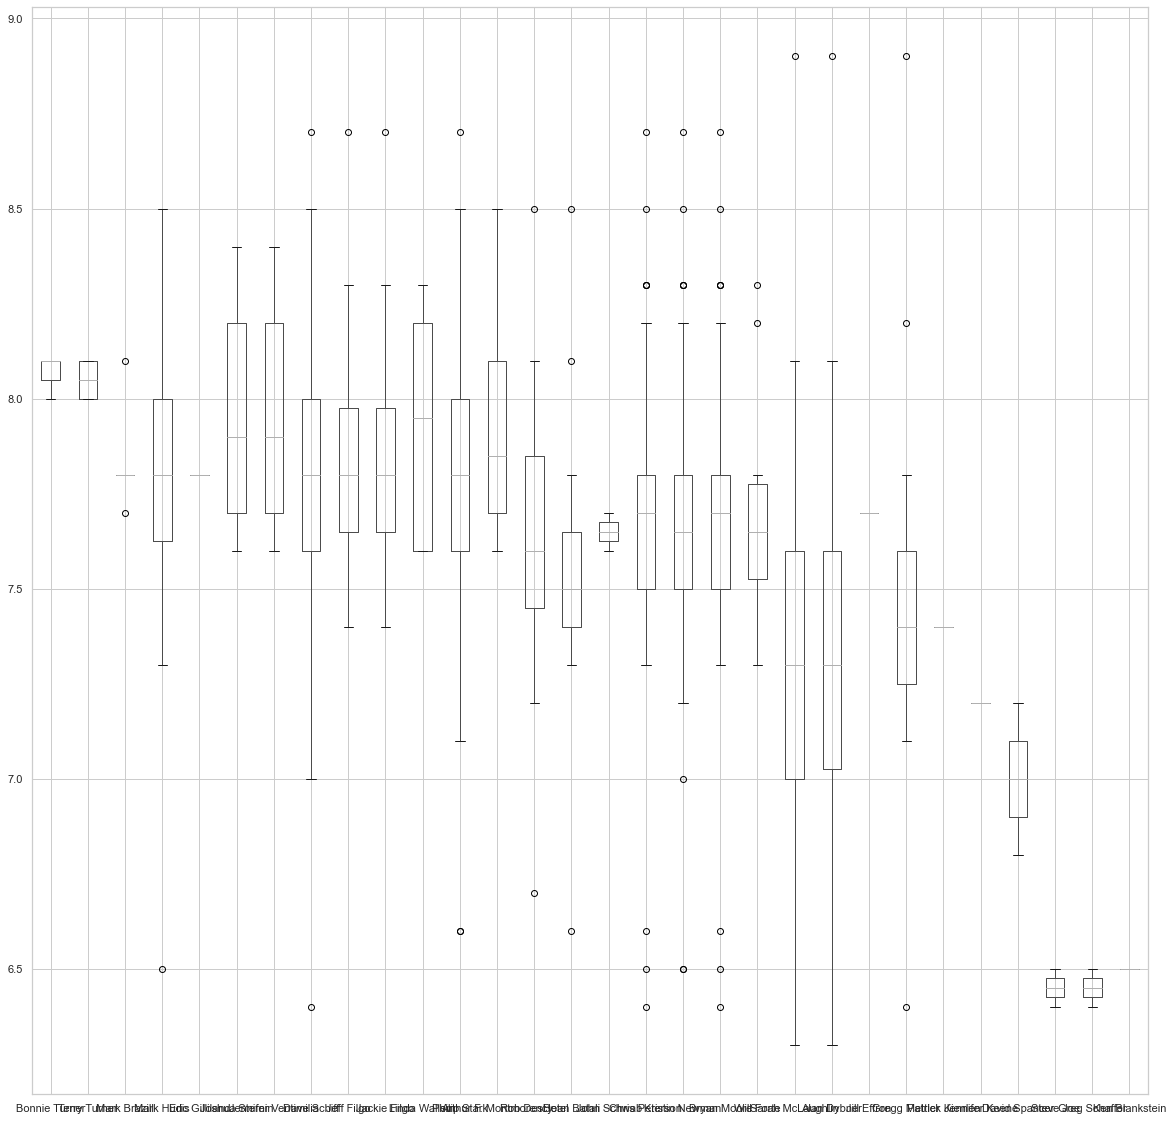

In [87]:
scores_frame.T.boxplot(figsize = (20,20))

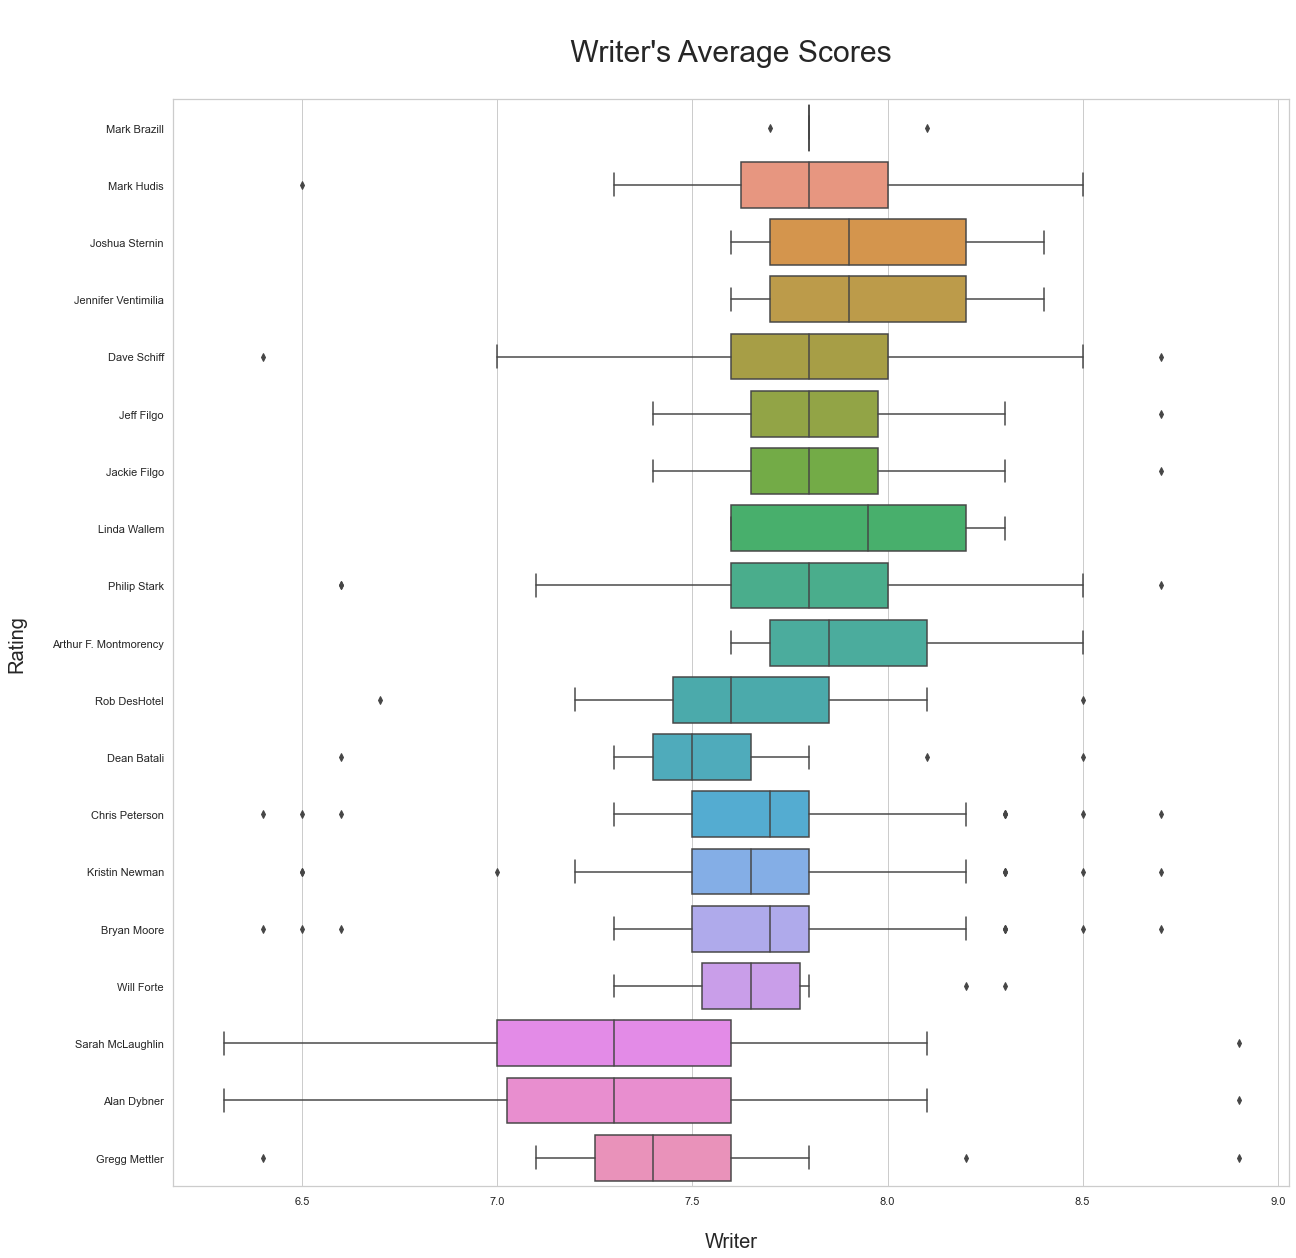

In [116]:
dims = (20,20)
fig, ax = plt.subplots(figsize = dims)
ax.set_title("\n Writer's Average Scores \n", size = 30)
sns.boxplot(ax = ax, data = scores_frame.T, orient = "h")
#sns.violinplot(ax = ax, data = scores_frame.T, orient = "h")
#sns.swarmplot(ax = ax, data = scores_frame.T, orient = "h")
ax.set_xlabel("\nWriter", size = 20)
ax.set_ylabel("Rating\n", size = 20)
fig.savefig( "boxplot.png")

In [ ]:
#counts per season

In [16]:
beg_and_end = []

for writer in master_writers:
    beg = None
    end = None
    count = 0
    
    for x in range(writer_frame.shape[0]):
        for y in range(writer_frame.shape[1]):
            if  writer_frame.iloc[x,y] is not None and writer in writer_frame.iloc[x,y]:
                count += 1
                if beg == None:
                    beg = x
                else:
                    end = x
    if end == None:
        end = 7
                    
    beg_and_end.append([writer,beg,end,count])

beg_and_end

[['Bonnie Turner', 0, 0, 3],
 ['Terry Turner', 0, 0, 4],
 ['Mark Brazill', 0, 1, 5],
 ['Mark Hudis', 0, 7, 66],
 ['Eric Gilliland', 0, 7, 1],
 ['Joshua Sternin', 0, 2, 9],
 ['Jennifer Ventimilia', 0, 2, 9],
 ['Dave Schiff', 0, 7, 54],
 ['Jeff Filgo', 0, 6, 18],
 ['Jackie Filgo', 0, 6, 18],
 ['Linda Wallem', 0, 3, 8],
 ['Philip Stark', 0, 7, 66],
 ['Arthur F. Montmorency', 0, 1, 12],
 ['Rob DesHotel', 1, 7, 19],
 ['Dean Batali', 1, 7, 19],
 ['John Schwab', 1, 2, 2],
 ['Chris Peterson', 1, 7, 84],
 ['Kristin Newman', 2, 7, 84],
 ['Bryan Moore', 2, 7, 83],
 ['Will Forte', 2, 4, 10],
 ['Sarah McLaughlin', 3, 7, 73],
 ['Alan Dybner', 3, 7, 74],
 ['Jill Effron', 3, 7, 1],
 ['Gregg Mettler', 3, 7, 15],
 ['Patrick Kienlen', 5, 7, 1],
 ['Jennifer Keene', 5, 7, 1],
 ['David Spancer', 6, 7, 2],
 ['Steve Joe', 7, 7, 2],
 ['Greg Schaffer', 7, 7, 2],
 ['Ken Blankstein', 7, 7, 1]]

In [27]:
writer_stats = pd.DataFrame(beg_and_end, columns = ["Writer", "First Credit", "Last Credit", "Total Episodes"])
writer_stats.index = writer_stats["Writer"]
del writer_stats["Writer"]
writer_stats

,First Credit,Last Credit,Total Episodes
Writer,,,
Bonnie Turner,0,0,3
Terry Turner,0,0,4
Mark Brazill,0,1,5
Mark Hudis,0,7,66
Eric Gilliland,0,7,1
Joshua Sternin,0,2,9
Jennifer Ventimilia,0,2,9
Dave Schiff,0,7,54
Jeff Filgo,0,6,18


In [38]:
the_scores = pd.read_csv("writers_and_scores.csv")
the_scores.index = the_scores.iloc[:,0]
del the_scores["0"]
the_scores

,1,2,3,4,5,6,7,8,9,10,...,75,76,77,78,79,80,81,82,83,84
0,,,,,,,,,,,,,,,,,,,,,
Bonnie Turner,8.1,8.1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Terry Turner,8.1,8.1,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mark Brazill,8.1,7.7,7.8,7.8,7.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mark Hudis,8.1,7.8,7.7,7.7,8.2,8.0,7.9,7.8,7.6,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eric Gilliland,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joshua Sternin,7.7,8.0,8.4,7.6,8.2,7.9,8.3,7.7,7.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jennifer Ventimilia,7.7,8.0,8.4,7.6,8.2,7.9,8.3,7.7,7.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dave Schiff,8.2,7.4,8.5,7.8,7.6,7.6,8.2,7.9,7.8,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jeff Filgo,7.8,7.8,7.9,8.3,7.8,7.8,8.0,8.0,8.7,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
writer_stats["Mean Rating"] = the_scores.mean(axis = 1)
writer_stats

,First Credit,Last Credit,Total Episodes,Mean Rating
Writer,,,,
Bonnie Turner,0,0,3,8.066667
Terry Turner,0,0,4,8.050000
Mark Brazill,0,1,5,7.840000
Mark Hudis,0,7,66,7.819697
Eric Gilliland,0,7,1,7.800000
Joshua Sternin,0,2,9,7.944444
Jennifer Ventimilia,0,2,9,7.944444
Dave Schiff,0,7,54,7.775926
Jeff Filgo,0,6,18,7.855556


In [41]:
#writer_stats.to_csv("writer_stats.csv")

In [11]:
season_writers = []

for x in range(writer_frame.shape[0]):
    writers = []
    
    for y in range(len(writer_frame.iloc[x,:])):
        if writer_frame.iloc[x,y] != None:
            for writer in writer_frame.iloc[x,y]:
                if writer not in writers:
                    writers.append(writer)
                    
    season_writers.append(writers)
    season_writers.append(len(writers))

In [12]:
#season_writers = pd.DataFrame(season_writers)
#season_writers.to_csv("season_writer_numbers.csv")
season_writers

[['Bonnie Turner',
  'Terry Turner',
  'Mark Brazill',
  'Mark Hudis',
  'Eric Gilliland',
  'Joshua Sternin',
  'Jennifer Ventimilia',
  'Dave Schiff',
  'Jeff Filgo',
  'Jackie Filgo',
  'Linda Wallem',
  'Philip Stark',
  'Arthur F. Montmorency'],
 13,
 ['Dave Schiff',
  'Mark Hudis',
  'Arthur F. Montmorency',
  'Philip Stark',
  'Mark Brazill',
  'Joshua Sternin',
  'Jennifer Ventimilia',
  'Linda Wallem',
  'Jeff Filgo',
  'Jackie Filgo',
  'Rob DesHotel',
  'Dean Batali',
  'John Schwab',
  'Chris Peterson'],
 14,
 ['Joshua Sternin',
  'Jennifer Ventimilia',
  'Philip Stark',
  'Dave Schiff',
  'Kristin Newman',
  'Chris Peterson',
  'Bryan Moore',
  'Linda Wallem',
  'John Schwab',
  'Jackie Filgo',
  'Jeff Filgo',
  'Mark Hudis',
  'Dean Batali',
  'Rob DesHotel',
  'Will Forte'],
 15,
 ['Linda Wallem',
  'Kristin Newman',
  'Chris Peterson',
  'Bryan Moore',
  'Sarah McLaughlin',
  'Alan Dybner',
  'Jill Effron',
  'Mark Hudis',
  'Jeff Filgo',
  'Jackie Filgo',
  'Dave Schif

In [21]:
season_writers = []

for writer in master_writers:
    current_season = []
    current_season.append(writer)
    for x in range(writer_frame.shape[0]):
        wrote_in_season = 0
        for y in range(writer_frame.shape[1]):
            if  writer_frame.iloc[x,y] is not None and writer in writer_frame.iloc[x,y]:
                wrote_in_season = 1
        
        current_season.append(wrote_in_season)
                    
    season_writers.append(current_season)


# season_writers = []

# for writer in master_writers:
#     current_season = []
#     current_season.append(writer)
#     for x in range(writer_frame.shape[0]):
#         wrote_in_season = 0
#         for y in range(writer_frame.shape[1]):
#             if  writer_frame.iloc[x,y] is not None and writer in writer_frame.iloc[x,y]:
#                 wrote_in_season += 1
        
#         current_season.append(wrote_in_season)
                    
#     season_writers.append(current_season)

#season_writers

In [22]:
seas_writers = pd.DataFrame(season_writers)
seas_writers.to_csv("writer_heatmap_data.csv")
seas_writers

,0,1,2,3,4,5,6,7,8
0,Bonnie Turner,1,0,0,0,0,0,0,0
1,Terry Turner,1,0,0,0,0,0,0,0
2,Mark Brazill,1,1,0,0,0,0,0,0
3,Mark Hudis,1,1,1,1,1,1,1,1
4,Eric Gilliland,1,0,0,0,0,0,0,0
5,Joshua Sternin,1,1,1,0,0,0,0,0
6,Jennifer Ventimilia,1,1,1,0,0,0,0,0
7,Dave Schiff,1,1,1,1,1,1,1,1
8,Jeff Filgo,1,1,1,1,1,1,1,0
9,Jackie Filgo,1,1,1,1,1,1,1,0
